# Recognition hand-written MNIST dataset with Decision tree


En este tutorial utilizaremos el algoritmo "Decision tree" para reconocer dígitos escritos a mano. El objetivo consiste en identificar un caracter a partir de una imagen digitalizada que se representa como un conjunto de pixeles.
En este caso se usará python (https://www.python.org) como lenguaje de programación y la librería SciKit (http://scikit-learn.org/stable/. Para la data usaremos el dataset de MNIST que se puede obtener en http://yann.lecun.com/exdb/mnist/. 

Para iniciar, se debe decargar los datasets de MNIST, en la misma raiz de este jupyter notebook, en una carpeta 'MNIST_data':
    - t10k-images-idx3-ubyte.gz
    - t10k-labels-idx1-ubyte.gz
    - train-images-idx3-ubyte.gz
    - train-labels-idx1-ubyte.gz

Abrir una instancia de CMD, para descomprimir la data, ejecutar:

    gzip *ubyte.gz -d

Paralelamente se usara el paquete MNIST que se puede instalar desde la consola usando el comando:

    pip install python-mnist

In [1]:
# importar las librerias

%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from mnist import MNIST

In [2]:
#importar el dataset

mndata = MNIST('MNIST_data')

# cargar la data de training (features -> images y labels -> labels)

images, labels = mndata.load_training()

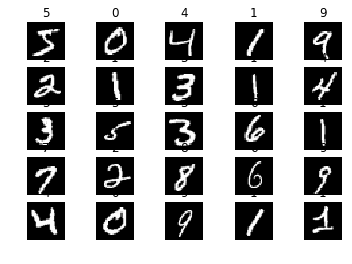

In [3]:
# vemos el contenido del data set, graficamos 25 imagenes del dataset de training

plt.gray()
for i in range(25):
    plt.subplot(5,5,i+1)
    
    d_image = images[i]
    d_image = np.array(d_image, dtype='float')
    pixels = d_image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.title(labels[i])
    plt.axis('off')
plt.show()

Es importante evaluar el rendimiento de un clasificador, en nuestro caso utilizando el algoritmo Decision tree. A continuación un método para evaluar nuestro clasificador.

Introducimos los conceptos:

    -  Confusion matrix / Matrix de confusión
    -  Score / puntuación

In [4]:
# definimos una funcion para evaluar el clasificador

def evaluate_classifier(clf, test_data, test_labels):
    pred = clf.predict(test_data)
    C = confusion_matrix(test_labels, pred)
    return C.diagonal().sum()*100./C.sum(),C

In [5]:
# Dividimos el dataset en:
#  -Datos de Entremamiento 70%  (features, labels)
#  -Datos de Testing  30%   (features y labels)

train_data, test_data, train_labels, test_labels = train_test_split(images, labels, test_size=0.3, random_state=42)

Hora de entrenar nuestro __"CLASIFICADOR"__
Usamos de la librería SciKit-learn, el algoritmo ya definido de __Decision Tree__, que nos permite definir los siguientes "hiperparámetros"


criterion : The function to measure the quality of a split. Default "gini"

max_depth : The maximum depth of the tree

max_features : The number of features to consider when looking for the best split

Más info: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [6]:
# Entrenamiento del Arbol de decisiones
# definimos el clasificador

clf = DecisionTreeClassifier()

# entrenamos el clasificador
clf.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [7]:
# vamos a evaluar nuestro clasificador con todo el "training" y "testing" set

s,C = evaluate_classifier(clf, test_data, test_labels)

# veremos el "score" y "confusion matrix" de nuestro clasificador elegido
print(s)
print(C)

85.77777777777777
[[1628    2   28   16   22   33   29    9   29    9]
 [   2 1903   22   17    4    5    8   12   13    8]
 [  17   28 1456   63   18   21   49   41   49   17]
 [  13   16   57 1501   12   82    9   43   74   39]
 [   7    7   22   14 1490   22   25   35   22   82]
 [  27   14   22   79   27 1326   44    9   62   43]
 [  23    5   27   14   26   41 1604    4   32   11]
 [   9   13   53   19   20   16    3 1755   16   33]
 [  20   27   64   50   48   54   39   22 1338   68]
 [  13   10   19   32   79   43   13   64   51 1439]]


Antes de avanzar, podemos hacer un par de pruebas

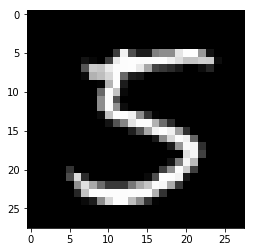

In [8]:
# Elegimos al azar una imagen del dataset de prueba. Index 8y lo graficamos para identificar q digito es

d = test_data[8]
d = np.array(d, dtype='float')
pixels = d.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [9]:
# Aplicamos el clasificador a este index para ver el resultado

print(clf.predict( [test_data[8]]))

[5]


Una vez nuestro clasificador este listo, podemos usar nuestro testing data

In [10]:
# Cargamos los datos de evaluacion

eval_data, eval_labels = mndata.load_testing()

In [11]:
# Aplicamos el clasificador a todo el dataset de Evaluacion y obtenemos el Accuracy

p = clf.predict(eval_data)

In [12]:
# Evaluamos los resultados con la matriz de confusion para el dataset de Evaluacion

sEval,CEval = evaluate_classifier(clf, eval_data, np.array(eval_labels))

print(sEval)
print(CEval)

86.32
[[ 911    1    5    3   11   10   13    5   13    8]
 [   1 1083   13   11    1    3    1    3   18    1]
 [  12   13  861   31   14   12   25   27   28    9]
 [   8    8   23  840    3   58    8   13   28   21]
 [   8    4   23    9  838   11   10   13   22   44]
 [  15   13    6   46    7  726   15    9   30   25]
 [  20    0   15    6   16   22  850    1   23    5]
 [   2   15   22   11   10    3    2  934    6   23]
 [   8   10   28   40   28   32   29   12  764   23]
 [  12    4    5   19   55   23    5   24   37  825]]


Conclusiones Clasificador Decision Tree funciona! al parecer podemos tener 86.32% de seguridad que nos dirá el digito correcto de la imagen.

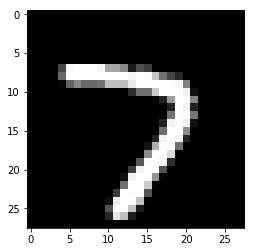

In [13]:
# Identificamos y predecimos para el index 17 del dataset de evaluacion

d = eval_data[17]
d = np.array(d, dtype='float')
pixels = d.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [23]:
print(clf.predict( [eval_data[17]]))

[7]
